In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("taweilo/iris-dataset-elarged-with-smote")

print("Path to dataset files:", path)

dataset_path = path + "/iris_synthetic_data.csv"  # Update with the actual filename


Path to dataset files: C:\Users\ranul\.cache\kagglehub\datasets\taweilo\iris-dataset-elarged-with-smote\versions\1


In [3]:
df = pd.read_csv(dataset_path)

print(df.head())

   sepal length  sepal width  petal length  petal width        label
0           5.2          3.8           1.5          0.3  Iris-setosa
1           5.3          4.1           1.5          0.1  Iris-setosa
2           4.8          3.1           1.5          0.2  Iris-setosa
3           5.2          3.7           1.5          0.2  Iris-setosa
4           4.9          3.0           1.5          0.3  Iris-setosa


In [4]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

Missing Values in Each Column:
 sepal length    0
sepal width     0
petal length    0
petal width     0
label           0
dtype: int64


In [5]:
class_counts = df.iloc[:, -1].value_counts()  # Assuming the last column is the target
print(class_counts)

label
Iris-setosa        1000
Iris-versicolor    1000
Iris-virginica     1000
Name: count, dtype: int64


In [6]:
X = df.iloc[:, :-1].values  # All columns except the last
y = df.iloc[:, -1].values   # Last column as target

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
ovo_svm = SVC(kernel='linear', decision_function_shape='ovo')
ovo_svm.fit(X_train, y_train)
# Predict (OvO)
y_pred_ovo = ovo_svm.predict(X_test)

In [10]:
ova_svm = SVC(kernel='linear', decision_function_shape='ovr')
ova_svm.fit(X_train, y_train)
# Predict (OvA)
y_pred_ova = ova_svm.predict(X_test)

In [11]:
print("\nOne-vs-One (OvO) Accuracy:", accuracy_score(y_test, y_pred_ovo))
print("One-vs-All (OvA) Accuracy:", accuracy_score(y_test, y_pred_ova))


One-vs-One (OvO) Accuracy: 0.995
One-vs-All (OvA) Accuracy: 0.995



OvO Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      0.98      0.99       200
 Iris-virginica       0.99      1.00      0.99       200

       accuracy                           0.99       600
      macro avg       1.00      0.99      0.99       600
   weighted avg       1.00      0.99      0.99       600



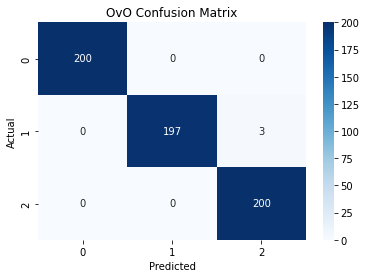

In [12]:
# Confusion Matrix & Classification Report for OvO
print("\nOvO Classification Report:\n", classification_report(y_test, y_pred_ovo))
sns.heatmap(confusion_matrix(y_test, y_pred_ovo), annot=True, fmt='d', cmap='Blues')
plt.title("OvO Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


OvA Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00       200
Iris-versicolor       1.00      0.98      0.99       200
 Iris-virginica       0.99      1.00      0.99       200

       accuracy                           0.99       600
      macro avg       1.00      0.99      0.99       600
   weighted avg       1.00      0.99      0.99       600



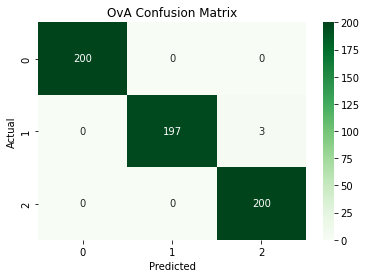

In [13]:
# Confusion Matrix & Classification Report for OvA
print("\nOvA Classification Report:\n", classification_report(y_test, y_pred_ova))
sns.heatmap(confusion_matrix(y_test, y_pred_ova), annot=True, fmt='d', cmap='Greens')
plt.title("OvA Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

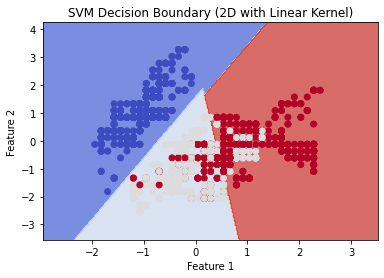

In [14]:
# Select first two features for visualization
X_vis = df.iloc[:, :2].values
y_vis = df.iloc[:, -1].values

# Feature scaling
X_vis = scaler.fit_transform(X_vis)

# Split dataset
X_train_vis, X_test_vis, y_train_vis, y_test_vis = train_test_split(X_vis, y_vis, test_size=0.2, random_state=42, stratify=y_vis)

# Encode labels to integers
label_map = {label: idx for idx, label in enumerate(np.unique(y_vis))}
y_train_vis_encoded = np.array([label_map[label] for label in y_train_vis])
y_test_vis_encoded = np.array([label_map[label] for label in y_test_vis])

# Train SVM using linear kernel (OvO or OvA)
svm_model = SVC(kernel='linear', decision_function_shape='ovr')  # or 'ovo' for OvO
svm_model.fit(X_train_vis, y_train_vis_encoded)

# Create meshgrid for plotting decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_vis[:, 0].min() - 1, X_vis[:, 0].max() + 1
y_min, y_max = X_vis[:, 1].min() - 1, X_vis[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on meshgrid to plot the decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train_vis_encoded, cmap=plt.cm.coolwarm, marker='o')

# Map the encoded values back to string labels for display
y_train_vis_labels = [list(label_map.keys())[list(label_map.values()).index(val)] for val in y_train_vis_encoded]

plt.title("SVM Decision Boundary (2D with Linear Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

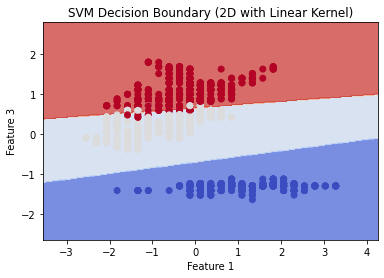

In [15]:
# Select 2nd and 3rd features for visualization (columns 1 and 2)
X_vis2 = df.iloc[:, 1:3].values
y_vis2 = df.iloc[:, -1].values

# Feature scaling
X_vis2 = scaler.fit_transform(X_vis2)

# Split dataset
X_train_vis2, X_test_vis2, y_train_vis2, y_test_vis2 = train_test_split(X_vis2, y_vis2, test_size=0.2, random_state=42, stratify=y_vis2)

# Encode labels to integers
label_map2 = {label: idx for idx, label in enumerate(np.unique(y_vis2))}
y_train_vis2_encoded = np.array([label_map[label] for label in y_train_vis2])
y_test_vis2_encoded = np.array([label_map[label] for label in y_test_vis2])

# Train SVM using linear kernel (OvO or OvA)
svm_model = SVC(kernel='linear', decision_function_shape='ovo')  # or 'ovo' for OvO
svm_model.fit(X_train_vis2, y_train_vis2_encoded)

# Create meshgrid for plotting decision boundary
h = .02  # step size in the mesh
x_min2, x_max2 = X_vis2[:, 0].min() - 1, X_vis2[:, 0].max() + 1
y_min2, y_max2 = X_vis2[:, 1].min() - 1, X_vis2[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min2, x_max2, h),
                     np.arange(y_min2, y_max2, h))

# Predict on meshgrid to plot the decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, alpha=0.75, cmap=plt.cm.coolwarm)
plt.scatter(X_train_vis2[:, 0], X_train_vis2[:, 1], c=y_train_vis2_encoded, cmap=plt.cm.coolwarm, marker='o')

# Map the encoded values back to string labels for display
y_train_vis2_labels = [list(label_map.keys())[list(label_map.values()).index(val)] for val in y_train_vis2_encoded]

plt.title("SVM Decision Boundary (2D with Linear Kernel)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 3")
plt.show()

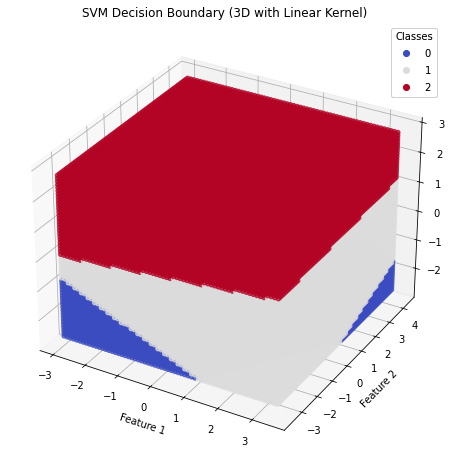

In [19]:
# Select first three features for visualization
X_vis3 = df.iloc[:, :3].values  # This selects columns 0, 1, and 2
y_vis3 = df.iloc[:, -1].values   # Last column as target

# Feature scaling
X_vis3 = scaler.fit_transform(X_vis3)

# Split dataset
X_train_vis3, X_test_vis3, y_train_vis3, y_test_vis3 = train_test_split(X_vis3, y_vis3, test_size=0.2, random_state=42, stratify=y_vis3)

# Encode labels to integers
label_map3 = {label: idx for idx, label in enumerate(np.unique(y_vis3))}
y_train_vis3_encoded = np.array([label_map[label] for label in y_train_vis3])
y_test_vis3_encoded = np.array([label_map[label] for label in y_test_vis3])

# Train SVM using linear kernel (OvO or OvA)
svm_model = SVC(kernel='linear', decision_function_shape='ovr')  # or 'ovo' for OvO
svm_model.fit(X_train_vis3, y_train_vis3_encoded)

# 3D Plotting setup
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Create a meshgrid for plotting decision boundaries
h = 0.1  # step size in the mesh
x_min3, x_max3 = X_vis3[:, 0].min() - 1, X_vis3[:, 0].max() + 1
y_min3, y_max3 = X_vis3[:, 1].min() - 1, X_vis3[:, 1].max() + 1
z_min3, z_max3 = X_vis3[:, 2].min() - 1, X_vis3[:, 2].max() + 1

xx, yy, zz = np.meshgrid(np.arange(x_min3, x_max3, h),np.arange(y_min3, y_max3, h),np.arange(z_min3, z_max3, h))

# Predict on meshgrid to plot the decision boundary
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
ax.scatter(xx, yy, zz, c=Z, cmap=plt.cm.coolwarm, alpha=0.75)

# Plot the training points
scatter = ax.scatter(X_train_vis3[:, 0], X_train_vis3[:, 1], X_train_vis3[:, 2], c=y_train_vis3_encoded, cmap=plt.cm.coolwarm, marker='o')

# Legend for the labels
legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
ax.add_artist(legend1)

# Labels
ax.set_title("SVM Decision Boundary (3D with Linear Kernel)")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()
